In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas import DataFrame
from pandas import Series
from pandas import concat
from math import sqrt
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/local/python/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/local/python/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()


Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/local/python/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/local/python/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [4]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
path='output/fileNo_.csv'

df = pd.read_csv(path,keep_default_na=False) 
df['callTime_GMT']= pd.to_datetime(df['callTime_GMT'])

 
df=df.loc[df["competitorStatus"] == "ACTIVE"]

df=df.loc[df["inplay"] == False]
df[['bckPrc1']]= df[['bckPrc1']].astype(float)
df[['layPrc1']]= df[['layPrc1']].astype(float)
index=df["callTime_GMT"]
df.set_index("callTime_GMT", inplace=True)

df[df.isnull().values==True]
ID = np.unique(df['selectionId'])

In [6]:
df=df.loc[df["selectionId"] == ID[1]]
df = df.sort_values('callTime_GMT')

In [8]:
np.mean(df[['bckPrc1']])

bckPrc1    51.697507
dtype: float64

In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY =[],[] 
    for i in range(len(dataset)- look_back -1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [8]:
data = df.loc[:,["bckPrc1"]]
dataL = df.loc[:,["layPrc1"]]


col_size = int(data.iloc[:,0].size)
cut_size = int(col_size*0.6)

data=data.iloc[:,0:1].values 

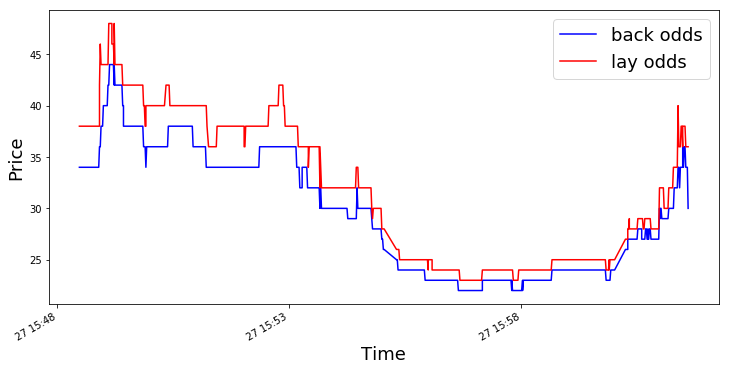

In [9]:
plt.figure(figsize = (12,6))
df["bckPrc1"][cut_size:].plot(color='b',label='back odds')
df["layPrc1"][cut_size:].plot(color='r',label='lay odds')

plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(fontsize=18,loc = 'upper right')
plt.show
plt.show()

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(data)

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.6)
test_size = int(len(dataset) * 0.4)
train, test = dataset[0:train_size], dataset[-test_size:]

In [12]:
train.shape

(1420, 1)

In [13]:
# reshape into X=t and Y=t+1
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back,1))

In [15]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(input_dim=1,output_dim=100,return_sequences=False))
#model.add(Dropout(0.3))

#model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('tanh'))

start=time.time()
model.compile(loss='mean_squared_error',optimizer='Adam')


history=model.fit(trainX,trainY,batch_size=len(train),nb_epoch=60,shuffle = True,validation_split=0.2,verbose=2)

print ('compilation time:',time.time()-start)


/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=100)`
  after removing the cwd from sys.path.
/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # Remove the CWD from sys.path while we load stuff.
/cs/home/fq4/tensorflow_venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1095 samples, validate on 274 samples
Epoch 1/60
 - 1s - loss: 0.2314 - val_loss: 0.1756
Epoch 2/60
 - 0s - loss: 0.1961 - val_loss: 0.1585
Epoch 3/60
 - 0s - loss: 0.1594 - val_loss: 0.1411
Epoch 4/60
 - 0s - loss: 0.1250 - val_loss: 0.1238
Epoch 5/60
 - 0s - loss: 0.0942 - val_loss: 0.1067
Epoch 6/60
 - 0s - loss: 0.0679 - val_loss: 0.0897
Epoch 7/60
 - 0s - loss: 0.0465 - val_loss: 0.0728
Epoch 8/60
 - 0s - loss: 0.0306 - val_loss: 0.0561
Epoch 9/60
 - 0s - loss: 0.0204 - val_loss: 0.0401
Epoch 10/60
 - 0s - loss: 0.0158 - val_loss: 0.0261
Epoch 11/60
 - 0s - loss: 0.0154 - val_loss: 0.0154
Epoch 12/60
 - 0s - loss: 0.0171 - val_loss: 0.0084
Epoch 13/60
 - 0s - loss: 0.0186 - val_loss: 0.0046
Epoch 14/60
 - 0s - loss: 0.0190 - val_loss: 0.0029
Epoch 15/60
 - 0s - loss: 0.0179 - val_loss: 0.0025
Epoch 16/60
 - 0s - loss: 0.0159 - val_loss: 0.0025
Epoch 17/60
 - 0s - loss: 0.0134 - val_loss: 0.0026
Epoch 18/60
 - 0s - loss: 0.0107 - val_loss: 0.0027
Epoch 19/60
 - 0s - loss: 

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [17]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)



In [32]:
import scipy.stats as stats

In [33]:
stats.pearsonr(testY,testPredict)

(array([0.98788048]), array([0.]))

In [18]:

trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [31]:
R=r2_score(testY,testPredict)

-0.9845196901226019

In [2]:

absError = abs(testPredict-testY)
print("MAE = ", mean_absolute_error(testY，testPredict))

SyntaxError: invalid character in identifier (<ipython-input-2-8bebd19e0d42>, line 3)

In [20]:
print("R squared = ", r2_score(testY,testPredict))

R squared =  -0.9822998694401381


In [22]:
print("mape=",mean_absolute_percentage_error(testY,testPredict))

mape= 29.332660311236115


In [23]:

print ('RMSE: %.4f'% np.sqrt(sum((testPredict-testY)**2)/train_size))

RMSE: 6.6206


In [24]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.26 RMSE
Test Score: 8.34 RMSE


In [25]:
# shift train predictions for plotting
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:]=np.nan
trainPredictPlot=np.reshape(trainPredictPlot,(dataset.shape[0],1))
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [26]:
# shift test predictions for plotting
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:]=np.nan
testPredictPlot=np.reshape(testPredictPlot,(dataset.shape[0],1))
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-2, :] = testPredict

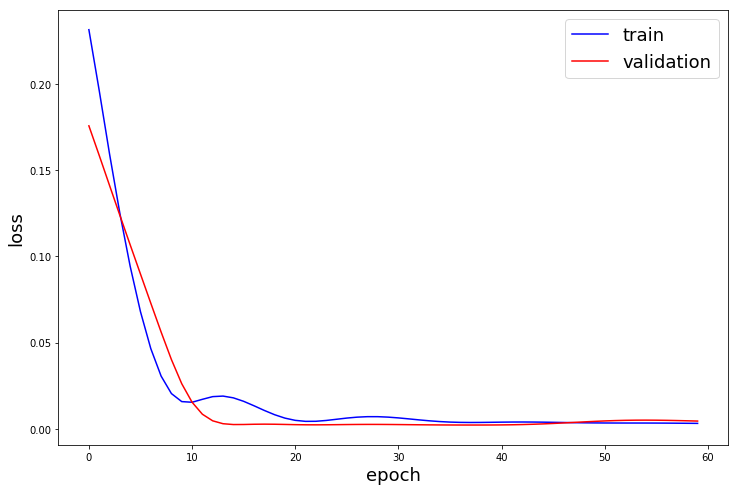

In [27]:
#summarize history for loss
fig=plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],color='blue',label = 'train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend(fontsize=18)
plt.ylabel('loss',fontsize=18)
plt.xlabel('epoch',fontsize=18)
plt.show()

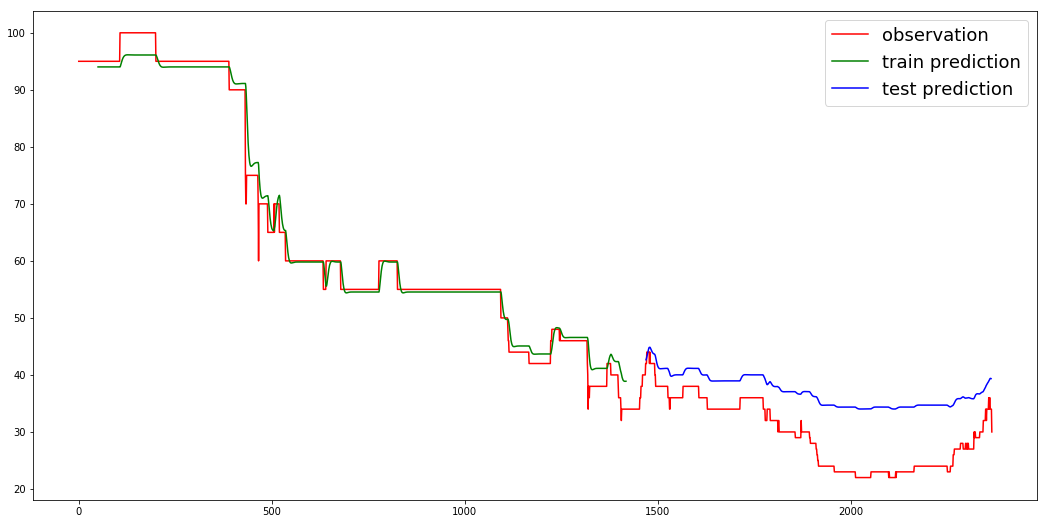

In [28]:
#plot predictions
fig=plt.figure(figsize=(18,9))
plt.plot(scaler.inverse_transform(dataset),color='r',label='observation')
plt.plot(trainPredictPlot,label='train prediction',color='green')
plt.plot(testPredictPlot,color='b',label='test prediction')
plt.legend(loc='upper right',fontsize=18)
plt.show()